In [22]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings

    
df = pd.read_csv('ozi2.csv',index_col='tarih',parse_dates=True)
df.head()

,Satis 70-73,evlilik,konut
tarih,,,
jan21,62085,21782,333652
feb21,57233,24713,333652
mar21,59638,36969,333652
apr21,66704,31227,278599
may21,22777,21775,278599


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=742.554, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=743.626, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=746.218, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=741.196, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=754.941, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.845 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -369.598
Date:                Thu, 21 Mar 2024   AIC                            741.196
Time:                        20:57:45   BIC                            742.722
Sample:                             0   HQIC                           741.716
                    

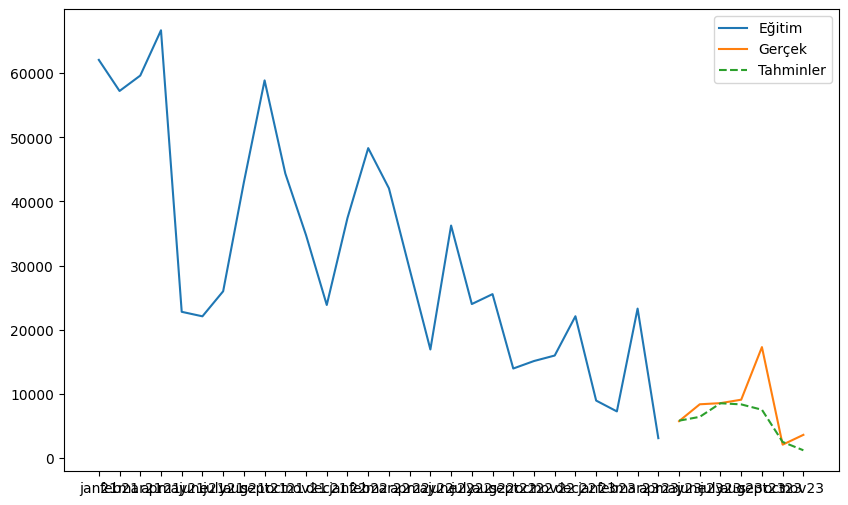

In [23]:
# Varsayılan olarak, tüm potansiyel dışsal değişkenleri kullanacağız
exog = df.drop('Satis 70-73', axis=1)

warnings.filterwarnings("ignore")

# En iyi ARIMA modelini bul (ARIMAX için dışsal değişkenleri 'exogenous' parametresiyle ekle)
stepwise_fit = auto_arima(df['Satis 70-73'], exogenous=exog, seasonal=False, trace=True,
                          error_action='ignore', suppress_warnings=True)

# En iyi model parametrelerini yazdır
print(stepwise_fit.summary())

# Eğitim ve test setlerini ayır (Burada son 5 gözlemi test seti olarak ayırıyorum)
train = df.iloc[:-7]
test = df.iloc[-7:]

# Eğitim ve test için dışsal değişkenleri ayır
exog_train = exog.iloc[:-7]
exog_test = exog.iloc[-7:]

# Modeli oluştur ve uygula (exog parametresiyle dışsal değişkenleri ekle)
model = ARIMA(train['Satis 70-73'], order=stepwise_fit.order, exog=exog_train)
model_fit = model.fit()

# Tahmin yap (exog parametresiyle dışsal değişkenleri ekle)
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, exog=exog_test, typ='levels')

# Tahminleri yazdır ve grafik çiz
print(predictions)
plt.figure(figsize=(10,6))
plt.plot(train['Satis 70-73'], label='Eğitim')
plt.plot(test['Satis 70-73'], label='Gerçek')
plt.plot(predictions, label='Tahminler', linestyle='--')
plt.legend(loc='best')
plt.show()


tarih
jan21     -2269.649434
feb21     62469.210434
mar21     58839.579011
apr21     59730.931741
may21     65464.983615
june21    29786.120406
july21    22355.389822
aug21     27208.907874
sept21    40301.886493
oct21     54062.861448
nov21     42664.279311
dec21     33920.043921
jan22     25418.465823
feb22     38203.495655
mar22     49797.081887
apr22     39826.423566
may22     33572.708586
june22    18158.465660
july22    36534.963199
aug22     25418.269548
sept22    24296.803850
oct22      8807.737171
nov22     13547.656498
dec22     14814.559612
jan23     24894.142252
feb23      8401.086571
mar23      8984.495495
apr23     21980.968815
Name: predicted_mean, dtype: float64


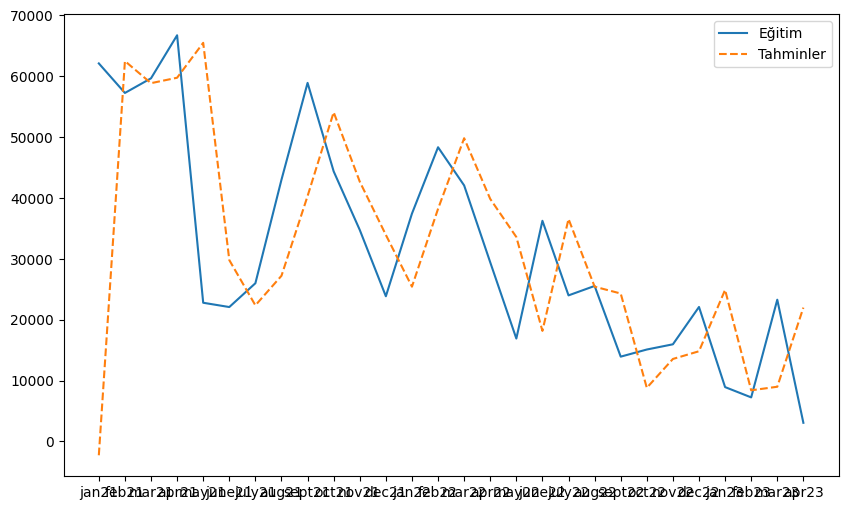

In [19]:
# Eğitim ve test setlerini ayır (Burada son 5 gözlemi test seti olarak ayırıyorum)
train = df.iloc[:-7]
test = df.iloc[-7:]

# Eğitim ve test için dışsal değişkenleri ayır
exog_train = exog.iloc[:-7]
exog_test = exog.iloc[-7:]

# Modeli oluştur ve uygula (exog parametresiyle dışsal değişkenleri ekle)
model = ARIMA(train['Satis 70-73'], order=stepwise_fit.order, exog=exog_train)
model_fit = model.fit()

# Eğitim verisi üzerindeki tahminleri hesapla (exog parametresiyle dışsal değişkenleri ekle)
start = 0
end = len(train) - 1
predictions = model_fit.predict(start=start, end=end, exog=exog_train, typ='levels')



# Tahminleri yazdır ve grafik çiz
print(predictions)
plt.figure(figsize=(10,6))
plt.plot(train['Satis 70-73'], label='Eğitim')
plt.plot(predictions, label='Tahminler', linestyle='--')
plt.legend(loc='best')
plt.show()